# PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

## Import Necessary Libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adam_v2
from keras.wrappers.scikit_learn import KerasClassifier

import warnings
warnings.filterwarnings('ignore')

## Import the dataset 

In [98]:
data = pd.read_csv('forestfires.csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## EDA 

In [99]:
#Summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [100]:
#Checking the null values in dataset
data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [101]:
#Checking the duplicate values/rows in dataset
data[data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [102]:
#dropping duplicated rows
data.drop_duplicates(inplace=True)

In [103]:
#dropping unnecessary columns
data.drop(data.columns[11:30], axis=1, inplace=True)
data.reset_index(drop='index', inplace=True)

In [104]:
data.shape

(509, 12)

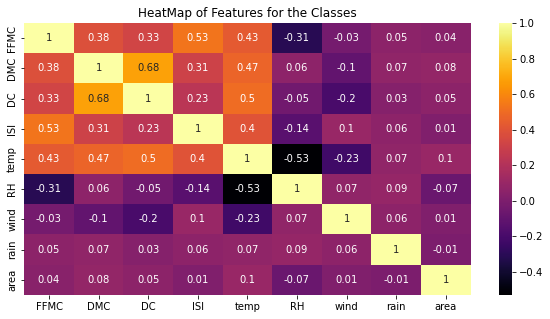

In [105]:
#Plotting heatmap for features
plt.figure(figsize=(10,5))
sns.heatmap(data.corr().round(2), annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")
plt.show()

In [106]:
data.size_category.value_counts()

small    371
large    138
Name: size_category, dtype: int64

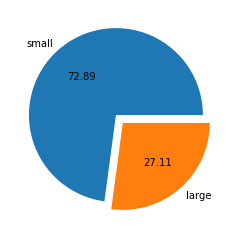

In [107]:
#Visualizing size_category
plt.pie(x=data.size_category.value_counts(), autopct='%0.2f', labels=['small', 'large'], explode=(0.0,0.12))
plt.show()

In [108]:
# Checking for which value of area is categorised into large and small by creating crosstab between area and size_category
pd.crosstab(data.area, data.size_category)

size_category,large,small
area,,
0.00,0,240
0.09,0,1
0.17,0,1
0.21,0,1
0.24,0,1
...,...,...
200.94,1,0
212.88,1,0
278.53,1,0


In [109]:
# Encoding month and day features

data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                           (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


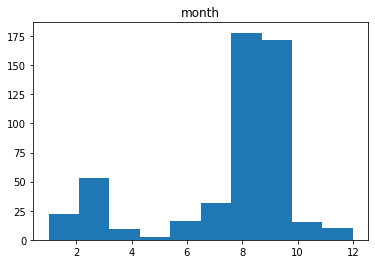

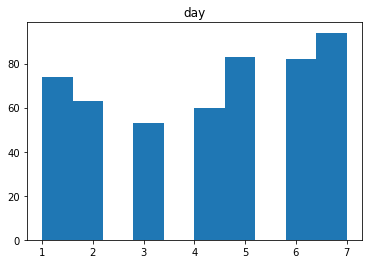

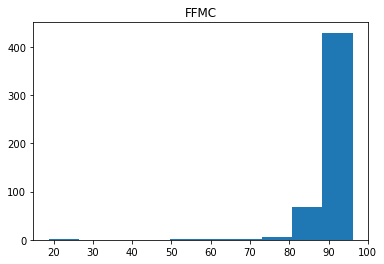

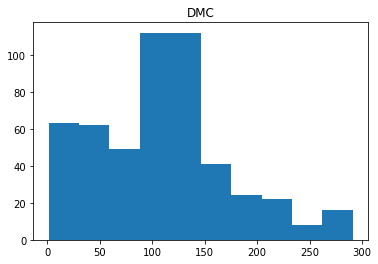

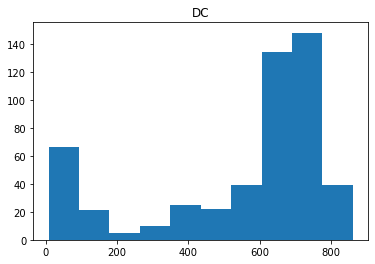

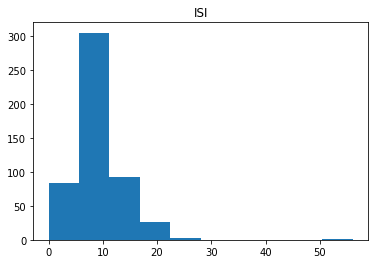

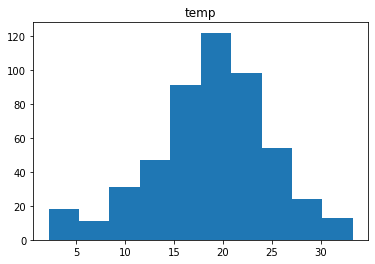

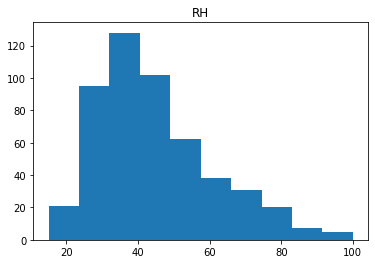

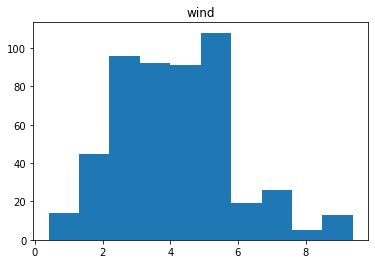

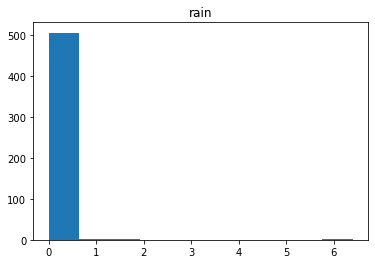

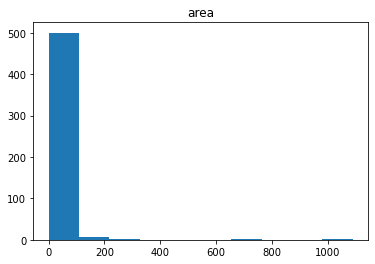

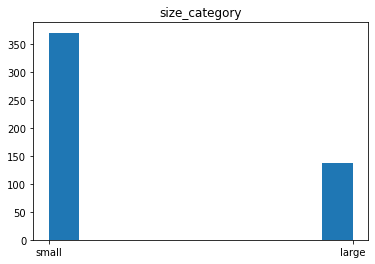

In [110]:
#Checking the distribution of data
col = data.columns
for i in col:
    plt.hist(data[i])
    plt.title(i)
    plt.show()

## Splitting the dataset 

In [111]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [112]:
X.shape, y.shape

((509, 11), (509,))

## Encoding the target variable

In [113]:
le = LabelEncoder()
y = le.fit_transform(y)

In [114]:
np.unique(y)  #1 - small, 0- large

array([0, 1])

## Feature Scaling 

In [115]:
scale = StandardScaler()
X = scale.fit_transform(X)

## Model Building 

### Building the Architecture 

In [116]:
model = Sequential()
model.add(Dense(units=12, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dense(units=12, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

### Compile the Architecture 

In [117]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

## Model Training & Testing

In [118]:
hist = model.fit(X, y, batch_size=51, epochs=20, validation_split=0.3)

Epoch 1/20
7/7 [==============================] - 1s 31ms/step - loss: 0.7557 - accuracy: 0.3624 - val_loss: 0.7639 - val_accuracy: 0.4314
Epoch 2/20
7/7 [==============================] - 0s 5ms/step - loss: 0.7165 - accuracy: 0.4663 - val_loss: 0.7357 - val_accuracy: 0.4706
Epoch 3/20
7/7 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5225 - val_loss: 0.7152 - val_accuracy: 0.5098
Epoch 4/20
7/7 [==============================] - 0s 5ms/step - loss: 0.6718 - accuracy: 0.6292 - val_loss: 0.6993 - val_accuracy: 0.5294
Epoch 5/20
7/7 [==============================] - 0s 5ms/step - loss: 0.6547 - accuracy: 0.6573 - val_loss: 0.6873 - val_accuracy: 0.5359
Epoch 6/20
7/7 [==============================] - 0s 5ms/step - loss: 0.6396 - accuracy: 0.7051 - val_loss: 0.6772 - val_accuracy: 0.5686
Epoch 7/20
7/7 [==============================] - 0s 5ms/step - loss: 0.6270 - accuracy: 0.7331 - val_loss: 0.6689 - val_accuracy: 0.6275
Epoch 8/20
7/7 [=================

In [119]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Model Evaluation 

In [120]:
scores = model.evaluate(X, y)

16/16 [==============================] - 0s 1ms/step - loss: 0.5562 - accuracy: 0.7564


### Visualizing the loss

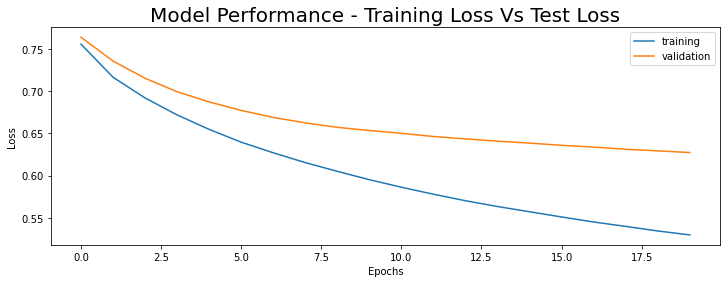

In [121]:
plt.figure(figsize=(12,4))
plt.plot(hist.history["loss"],label="training")
plt.plot(hist.history["val_loss"],label="validation")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Performance - Training Loss Vs Test Loss',size = 20)
plt.show()

### Visualizing the accuracy 

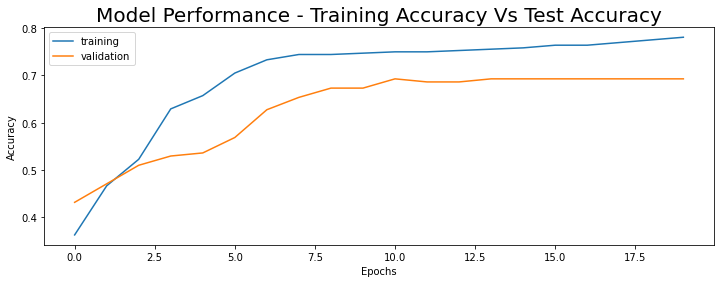

In [122]:
plt.figure(figsize=(12,4))
plt.plot(hist.history["accuracy"],label="training")
plt.plot(hist.history["val_accuracy"],label="validation")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Performance - Training Accuracy Vs Test Accuracy',size = 20)
plt.show()

#### Conclusion:
**As we can see, that validation loss is quite higher than training and also the validation accuracy is low compared to training accuracy. Hence, we will try to optimise the loss and improve accuracy by tuning some optimisers for model.**

## Tuning Optimisers for improving the performance of model 

In [123]:
#Selecting Adam as Optimiser for our model
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

## Model Training & Testing

In [124]:
hist = model.fit(X, y, batch_size=51, epochs=20, validation_split=0.3)

Epoch 1/20
7/7 [==============================] - 1s 30ms/step - loss: 0.5132 - accuracy: 0.7865 - val_loss: 0.6197 - val_accuracy: 0.7124
Epoch 2/20
7/7 [==============================] - 0s 5ms/step - loss: 0.4702 - accuracy: 0.8006 - val_loss: 0.6178 - val_accuracy: 0.7516
Epoch 3/20
7/7 [==============================] - 0s 6ms/step - loss: 0.4409 - accuracy: 0.8090 - val_loss: 0.6064 - val_accuracy: 0.7386
Epoch 4/20
7/7 [==============================] - 0s 5ms/step - loss: 0.4079 - accuracy: 0.8258 - val_loss: 0.5857 - val_accuracy: 0.7516
Epoch 5/20
7/7 [==============================] - 0s 4ms/step - loss: 0.3784 - accuracy: 0.8427 - val_loss: 0.5671 - val_accuracy: 0.7778
Epoch 6/20
7/7 [==============================] - 0s 4ms/step - loss: 0.3410 - accuracy: 0.8567 - val_loss: 0.5629 - val_accuracy: 0.7778
Epoch 7/20
7/7 [==============================] - 0s 5ms/step - loss: 0.3085 - accuracy: 0.8624 - val_loss: 0.5284 - val_accuracy: 0.7778
Epoch 8/20
7/7 [=================

In [125]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Model Evaluation 

In [126]:
scores = model.evaluate(X, y)

16/16 [==============================] - 0s 923us/step - loss: 0.1906 - accuracy: 0.9548


### Visualizing the loss

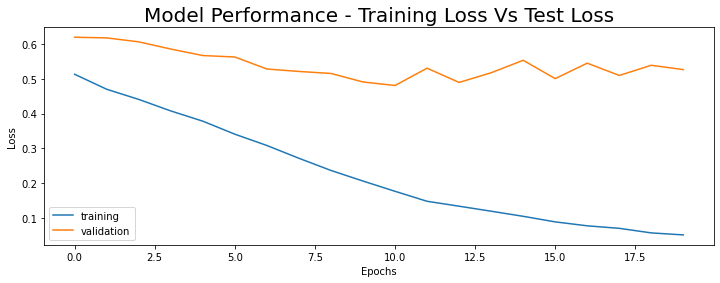

In [127]:
plt.figure(figsize=(12,4))
plt.plot(hist.history["loss"],label="training")
plt.plot(hist.history["val_loss"],label="validation")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Performance - Training Loss Vs Test Loss',size = 20)
plt.show()

### Visualizing the accuracy 

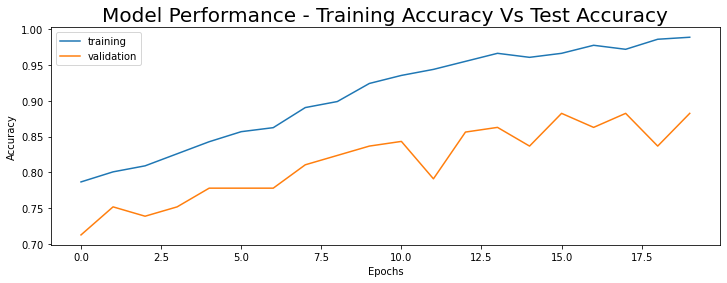

In [128]:
plt.figure(figsize=(12,4))
plt.plot(hist.history["accuracy"],label="training")
plt.plot(hist.history["val_accuracy"],label="validation")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Performance - Training Accuracy Vs Test Accuracy',size = 20)
plt.show()

#### Conclusion:
**As we can see, that there is an improvement in training & validation accuracy also the validation loss has been reduced compared to first model. Hence, we will try to optimise further the loss and improve accuracy by tuning optimisers for the model.**

## Tuning Optimisers for further improving the performance of model 

In [1]:
#Selecting Nadam as Optimiser for our model
opt = keras.optimizers.Nadam(learning_rate=0.01)
model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])

NameError: name 'keras' is not defined

## Model Training & Testing

In [130]:
hist = model.fit(X, y, batch_size=51, epochs=20, validation_split=0.3)

Epoch 1/20
7/7 [==============================] - 1s 31ms/step - loss: 0.0472 - accuracy: 0.9860 - val_loss: 0.5361 - val_accuracy: 0.8824
Epoch 2/20
7/7 [==============================] - 0s 6ms/step - loss: 0.0461 - accuracy: 0.9888 - val_loss: 0.5369 - val_accuracy: 0.8824
Epoch 3/20
7/7 [==============================] - 0s 6ms/step - loss: 0.0448 - accuracy: 0.9916 - val_loss: 0.5370 - val_accuracy: 0.8889
Epoch 4/20
7/7 [==============================] - 0s 6ms/step - loss: 0.0440 - accuracy: 0.9860 - val_loss: 0.5402 - val_accuracy: 0.8824
Epoch 5/20
7/7 [==============================] - 0s 6ms/step - loss: 0.0433 - accuracy: 0.9860 - val_loss: 0.5425 - val_accuracy: 0.8758
Epoch 6/20
7/7 [==============================] - 0s 6ms/step - loss: 0.0424 - accuracy: 0.9916 - val_loss: 0.5417 - val_accuracy: 0.8758
Epoch 7/20
7/7 [==============================] - 0s 5ms/step - loss: 0.0422 - accuracy: 0.9916 - val_loss: 0.5417 - val_accuracy: 0.8824
Epoch 8/20
7/7 [=================

In [131]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Model Evaluation 

In [132]:
scores = model.evaluate(X, y)

16/16 [==============================] - 0s 886us/step - loss: 0.1882 - accuracy: 0.9627


### Visualizing the loss

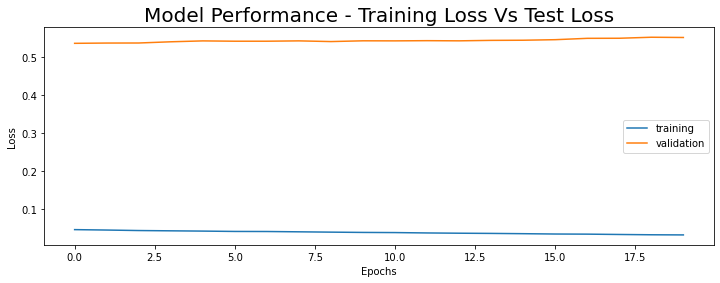

In [133]:
plt.figure(figsize=(12,4))
plt.plot(hist.history["loss"],label="training")
plt.plot(hist.history["val_loss"],label="validation")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Performance - Training Loss Vs Test Loss',size = 20)
plt.show()

### Visualizing the accuracy 

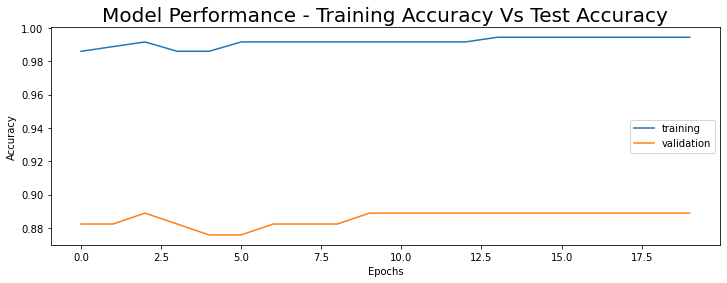

In [134]:
plt.figure(figsize=(12,4))
plt.plot(hist.history["accuracy"],label="training")
plt.plot(hist.history["val_accuracy"],label="validation")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Performance - Training Accuracy Vs Test Accuracy',size = 20)
plt.show()

#### Conclusion:
**As we can see, that training & validation loss are stagnant throughout with "NADAM" optimisers, so as the accuracy. So, NADAM optimiser is not a good choice as optimiser for our model.**

### Hyper-Parameter Tuning
* Batch & Epoch
* Activation, Optimiser, Learning rate, layers, dropout

#### Determining the best Batch & Epoch for our model

In [135]:
#We will create a function for our model for tuning
def create_model():
    model = Sequential()
    model.add(Dense(units=12, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dense(units=12, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [136]:
#As you can see, we have selected "Adam" as optimiser because it gave the best results w.r.t loss & accuracy.

In [137]:
#First we will select the best batch & epoch for our model

model = KerasClassifier(build_fn = create_model,verbose = 0)

size = [51, 105]
ep = [20,50,75]


param_grid = dict(batch_size = size,epochs = ep)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(n_splits=5, shuffle=True),verbose = 10)

grid_result = grid.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START batch_size=51, epochs=20....................................
[CV 1/5; 1/6] END .....batch_size=51, epochs=20;, score=0.892 total time=   1.6s
[CV 2/5; 1/6] START batch_size=51, epochs=20....................................
[CV 2/5; 1/6] END .....batch_size=51, epochs=20;, score=0.931 total time=   0.8s
[CV 3/5; 1/6] START batch_size=51, epochs=20....................................
[CV 3/5; 1/6] END .....batch_size=51, epochs=20;, score=0.951 total time=   0.8s
[CV 4/5; 1/6] START batch_size=51, epochs=20....................................
[CV 4/5; 1/6] END .....batch_size=51, epochs=20;, score=0.971 total time=   0.8s
[CV 5/5; 1/6] START batch_size=51, epochs=20....................................
[CV 5/5; 1/6] END .....batch_size=51, epochs=20;, score=0.931 total time=   0.8s
[CV 1/5; 2/6] START batch_size=51, epochs=50....................................
[CV 1/5; 2/6] END .....batch_size=51, epochs=50;,

In [138]:
grid_result.best_params_

{'batch_size': 51, 'epochs': 75}

In [140]:
grid_result.best_score_

0.9606678366661072

#### Determining the other hyper-parameters for our model 

In [141]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = adam_v2.Adam(learning_rate = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [51]
epochs = [75]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu']
init = ['glorot_uniform','normal']
neuron1 = [5,7,9]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(n_splits=5, shuffle=True),verbose = 10)
grid_result = grid.fit(X, y)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV 1/5; 1/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=5, neuron2=2
[CV 1/5; 1/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=5, neuron2=2;, score=0.735 total time=   1.3s
[CV 2/5; 1/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=5, neuron2=2
[CV 2/5; 1/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=5, neuron2=2;, score=0.784 total time=   2.0s
[CV 3/5; 1/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=5, neuron2=2
[CV 3/5; 1/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, ep

[CV 4/5; 5/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=7, neuron2=4;, score=0.686 total time=   1.3s
[CV 5/5; 5/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=7, neuron2=4
[CV 5/5; 5/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=7, neuron2=4;, score=0.723 total time=   1.1s
[CV 1/5; 6/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=7, neuron2=8
[CV 1/5; 6/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=7, neuron2=8;, score=0.735 total time=   1.2s
[CV 2/5; 6/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, l

[CV 3/5; 10/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=2;, score=0.951 total time=   1.3s
[CV 4/5; 10/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=2
[CV 4/5; 10/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=2;, score=0.951 total time=   1.4s
[CV 5/5; 10/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=2
[CV 5/5; 10/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=2;, score=0.950 total time=   1.2s
[CV 1/5; 11/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, 

[CV 2/5; 15/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=7, neuron2=8;, score=0.980 total time=   1.3s
[CV 3/5; 15/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=7, neuron2=8
[CV 3/5; 15/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=7, neuron2=8;, score=0.971 total time=   2.0s
[CV 4/5; 15/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=7, neuron2=8
[CV 4/5; 15/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=7, neuron2=8;, score=0.971 total time=   1.4s
[CV 5/5; 15/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, 

[CV 1/5; 20/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=0.961 total time=   1.3s
[CV 2/5; 20/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=4
[CV 2/5; 20/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=1.000 total time=   1.2s
[CV 3/5; 20/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=4
[CV 3/5; 20/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=0.980 total time=   1.2s
[CV 4/5; 20/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learn

[CV 5/5; 24/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=7, neuron2=8;, score=0.941 total time=   1.2s
[CV 1/5; 25/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=9, neuron2=2
[CV 1/5; 25/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=9, neuron2=2;, score=0.931 total time=   1.2s
[CV 2/5; 25/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=9, neuron2=2
[CV 2/5; 25/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=9, neuron2=2;, score=0.961 total time=   1.2s
[CV 3/5; 25/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learn

[CV 5/5; 29/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=0.723 total time=   1.2s
[CV 1/5; 30/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuron2=8
[CV 1/5; 30/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuron2=8;, score=0.735 total time=   1.3s
[CV 2/5; 30/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuron2=8
[CV 2/5; 30/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuron2=8;, score=0.784 total time=   1.3s
[CV 3/5; 30/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuron2=8
[

[CV 5/5; 34/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=2;, score=0.723 total time=   1.3s
[CV 1/5; 35/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=4
[CV 1/5; 35/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=4;, score=0.735 total time=   1.3s
[CV 2/5; 35/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=4
[CV 2/5; 35/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=4;, score=0.784 total time=   1.4s
[CV 3/5; 35/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=4
[

[CV 5/5; 39/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.01, neuron1=5, neuron2=8;, score=0.950 total time=   1.4s
[CV 1/5; 40/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=2
[CV 1/5; 40/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=2;, score=0.941 total time=   1.3s
[CV 2/5; 40/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=2
[CV 2/5; 40/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=2;, score=0.980 total time=   2.1s
[CV 3/5; 40/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=2
[CV 3/5

[CV 5/5; 44/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.01, neuron1=9, neuron2=4;, score=0.941 total time=   1.3s
[CV 1/5; 45/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.01, neuron1=9, neuron2=8
[CV 1/5; 45/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.01, neuron1=9, neuron2=8;, score=0.931 total time=   1.4s
[CV 2/5; 45/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.01, neuron1=9, neuron2=8
[CV 2/5; 45/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.01, neuron1=9, neuron2=8;, score=0.961 total time=   1.4s
[CV 3/5; 45/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.01, neuron1=9, neuron2=8
[CV 3/5

[CV 5/5; 49/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=2;, score=0.941 total time=   1.1s
[CV 1/5; 50/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=4
[CV 1/5; 50/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=4;, score=0.941 total time=   1.2s
[CV 2/5; 50/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=4
[CV 2/5; 50/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=4;, score=0.990 total time=   1.3s
[CV 3/5; 50/324] START activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=4
[CV 3/5; 50/3

[CV 5/5; 54/324] END activation_function=softmax, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.1, neuron1=9, neuron2=8;, score=0.960 total time=   1.2s
[CV 1/5; 55/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=5, neuron2=2
[CV 1/5; 55/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=5, neuron2=2;, score=0.735 total time=   1.3s
[CV 2/5; 55/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=5, neuron2=2
[CV 2/5; 55/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=5, neuron2=2;, score=0.784 total time=   1.3s
[CV 3/5; 55/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learn

[CV 4/5; 59/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=7, neuron2=4;, score=0.686 total time=   1.4s
[CV 5/5; 59/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=7, neuron2=4
[CV 5/5; 59/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=7, neuron2=4;, score=0.723 total time=   1.2s
[CV 1/5; 60/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=7, neuron2=8
[CV 1/5; 60/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=7, neuron2=8;, score=0.735 total time=   1.3s
[CV 2/5; 60/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_unif

[CV 3/5; 64/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=2;, score=0.922 total time=   1.4s
[CV 4/5; 64/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=2
[CV 4/5; 64/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=2;, score=0.941 total time=   1.3s
[CV 5/5; 64/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=2
[CV 5/5; 64/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=2;, score=0.970 total time=   1.3s
[CV 1/5; 65/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, 

[CV 2/5; 69/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=7, neuron2=8;, score=0.961 total time=   1.5s
[CV 3/5; 69/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=7, neuron2=8
[CV 3/5; 69/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=7, neuron2=8;, score=0.931 total time=   1.5s
[CV 4/5; 69/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=7, neuron2=8
[CV 4/5; 69/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=7, neuron2=8;, score=0.931 total time=   1.5s
[CV 5/5; 69/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, 

[CV 1/5; 74/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=0.971 total time=   1.4s
[CV 2/5; 74/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=4
[CV 2/5; 74/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=0.990 total time=   1.4s
[CV 3/5; 74/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=4
[CV 3/5; 74/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=0.971 total time=   1.4s
[CV 4/5; 74/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learn

[CV 5/5; 78/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=7, neuron2=8;, score=0.970 total time=   1.2s
[CV 1/5; 79/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=9, neuron2=2
[CV 1/5; 79/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=9, neuron2=2;, score=0.971 total time=   1.5s
[CV 2/5; 79/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=9, neuron2=2
[CV 2/5; 79/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=9, neuron2=2;, score=0.951 total time=   1.5s
[CV 3/5; 79/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learn

[CV 5/5; 83/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=0.723 total time=   1.3s
[CV 1/5; 84/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuron2=8
[CV 1/5; 84/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuron2=8;, score=0.735 total time=   1.4s
[CV 2/5; 84/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuron2=8
[CV 2/5; 84/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuron2=8;, score=0.784 total time=   1.4s
[CV 3/5; 84/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuron2=8
[

[CV 5/5; 88/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=2;, score=0.723 total time=   1.4s
[CV 1/5; 89/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=4
[CV 1/5; 89/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=4;, score=0.735 total time=   1.6s
[CV 2/5; 89/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=4
[CV 2/5; 89/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=4;, score=0.784 total time=   1.6s
[CV 3/5; 89/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=4
[

[CV 5/5; 93/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.01, neuron1=5, neuron2=8;, score=0.970 total time=   1.2s
[CV 1/5; 94/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=2
[CV 1/5; 94/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=2;, score=0.951 total time=   1.6s
[CV 2/5; 94/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=2
[CV 2/5; 94/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=2;, score=0.980 total time=   1.4s
[CV 3/5; 94/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=2
[CV 3/5

[CV 5/5; 98/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.01, neuron1=9, neuron2=4;, score=0.960 total time=   1.2s
[CV 1/5; 99/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.01, neuron1=9, neuron2=8
[CV 1/5; 99/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.01, neuron1=9, neuron2=8;, score=0.961 total time=   1.4s
[CV 2/5; 99/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.01, neuron1=9, neuron2=8
[CV 2/5; 99/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.01, neuron1=9, neuron2=8;, score=0.971 total time=   1.4s
[CV 3/5; 99/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.01, neuron1=9, neuron2=8
[CV 3/5

[CV 5/5; 103/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=2;, score=0.960 total time=   1.2s
[CV 1/5; 104/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=4
[CV 1/5; 104/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=4;, score=0.980 total time=   1.3s
[CV 2/5; 104/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=4
[CV 2/5; 104/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=4;, score=0.922 total time=   1.4s
[CV 3/5; 104/324] START activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=4
[CV 3/5

[CV 5/5; 108/324] END activation_function=softmax, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.1, neuron1=9, neuron2=8;, score=0.960 total time=   1.3s
[CV 1/5; 109/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=5, neuron2=2
[CV 1/5; 109/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=5, neuron2=2;, score=0.735 total time=   1.4s
[CV 2/5; 109/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=5, neuron2=2
[CV 2/5; 109/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=5, neuron2=2;, score=0.784 total time=   1.5s
[CV 3/5; 109/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform,

[CV 4/5; 113/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=7, neuron2=4;, score=0.686 total time=   1.6s
[CV 5/5; 113/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=7, neuron2=4
[CV 5/5; 113/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=7, neuron2=4;, score=0.723 total time=   1.4s
[CV 1/5; 114/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=7, neuron2=8
[CV 1/5; 114/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=7, neuron2=8;, score=0.735 total time=   1.4s
[CV 2/5; 114/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=gloro

[CV 3/5; 118/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=2;, score=0.922 total time=   1.4s
[CV 4/5; 118/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=2
[CV 4/5; 118/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=2;, score=0.931 total time=   1.5s
[CV 5/5; 118/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=2
[CV 5/5; 118/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=2;, score=0.950 total time=   1.3s
[CV 1/5; 119/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uni

[CV 2/5; 123/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=7, neuron2=8;, score=0.951 total time=   1.4s
[CV 3/5; 123/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=7, neuron2=8
[CV 3/5; 123/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=7, neuron2=8;, score=0.941 total time=   1.4s
[CV 4/5; 123/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=7, neuron2=8
[CV 4/5; 123/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=7, neuron2=8;, score=0.951 total time=   1.4s
[CV 5/5; 123/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uni

[CV 1/5; 128/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=0.951 total time=   1.4s
[CV 2/5; 128/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=4
[CV 2/5; 128/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=0.961 total time=   1.5s
[CV 3/5; 128/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=4
[CV 3/5; 128/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=0.971 total time=   1.4s
[CV 4/5; 128/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform,

[CV 5/5; 132/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=7, neuron2=8;, score=0.970 total time=   1.3s
[CV 1/5; 133/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=9, neuron2=2
[CV 1/5; 133/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=9, neuron2=2;, score=0.951 total time=   1.5s
[CV 2/5; 133/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=9, neuron2=2
[CV 2/5; 133/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=9, neuron2=2;, score=0.971 total time=   1.4s
[CV 3/5; 133/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform,

[CV 4/5; 137/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=0.686 total time=   1.4s
[CV 5/5; 137/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuron2=4
[CV 5/5; 137/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=0.723 total time=   1.2s
[CV 1/5; 138/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuron2=8
[CV 1/5; 138/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuron2=8;, score=0.735 total time=   1.8s
[CV 2/5; 138/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuro

[CV 4/5; 142/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=2;, score=0.686 total time=   2.2s
[CV 5/5; 142/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=2
[CV 5/5; 142/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=2;, score=0.723 total time=   1.3s
[CV 1/5; 143/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=4
[CV 1/5; 143/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=4;, score=0.735 total time=   1.4s
[CV 2/5; 143/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuro

[CV 4/5; 147/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.01, neuron1=5, neuron2=8;, score=0.931 total time=   1.4s
[CV 5/5; 147/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.01, neuron1=5, neuron2=8
[CV 5/5; 147/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.01, neuron1=5, neuron2=8;, score=0.960 total time=   1.3s
[CV 1/5; 148/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=2
[CV 1/5; 148/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=2;, score=0.941 total time=   1.5s
[CV 2/5; 148/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=2
[

[CV 4/5; 152/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.01, neuron1=9, neuron2=4;, score=0.922 total time=   2.3s
[CV 5/5; 152/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.01, neuron1=9, neuron2=4
[CV 5/5; 152/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.01, neuron1=9, neuron2=4;, score=0.960 total time=   1.5s
[CV 1/5; 153/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.01, neuron1=9, neuron2=8
[CV 1/5; 153/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.01, neuron1=9, neuron2=8;, score=0.922 total time=   1.4s
[CV 2/5; 153/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.01, neuron1=9, neuron2=8
[

[CV 4/5; 157/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=2;, score=0.941 total time=   1.4s
[CV 5/5; 157/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=2
[CV 5/5; 157/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=2;, score=0.950 total time=   1.3s
[CV 1/5; 158/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=4
[CV 1/5; 158/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=4;, score=0.941 total time=   1.4s
[CV 2/5; 158/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=4
[CV 2/5

[CV 4/5; 162/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.1, neuron1=9, neuron2=8;, score=0.961 total time=   1.4s
[CV 5/5; 162/324] START activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.1, neuron1=9, neuron2=8
[CV 5/5; 162/324] END activation_function=softmax, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.1, neuron1=9, neuron2=8;, score=0.970 total time=   1.2s
[CV 1/5; 163/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=5, neuron2=2
[CV 1/5; 163/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=5, neuron2=2;, score=0.765 total time=   1.3s
[CV 2/5; 163/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1

[CV 3/5; 167/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=7, neuron2=4;, score=0.755 total time=   1.3s
[CV 4/5; 167/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=7, neuron2=4
[CV 4/5; 167/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=7, neuron2=4;, score=0.745 total time=   1.3s
[CV 5/5; 167/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=7, neuron2=4
[CV 5/5; 167/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=7, neuron2=4;, score=0.752 total time=   1.2s
[CV 1/5; 168/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learnin

[CV 2/5; 172/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=2;, score=0.951 total time=   1.2s
[CV 3/5; 172/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=2
[CV 3/5; 172/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=2;, score=0.990 total time=   1.3s
[CV 4/5; 172/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=2
[CV 4/5; 172/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=2;, score=0.961 total time=   1.2s
[CV 5/5; 172/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rat

[CV 1/5; 177/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=7, neuron2=8;, score=0.941 total time=   1.3s
[CV 2/5; 177/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=7, neuron2=8
[CV 2/5; 177/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=7, neuron2=8;, score=0.980 total time=   1.9s
[CV 3/5; 177/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=7, neuron2=8
[CV 3/5; 177/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=7, neuron2=8;, score=0.980 total time=   1.3s
[CV 4/5; 177/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rat

[CV 5/5; 181/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=2;, score=0.960 total time=   1.2s
[CV 1/5; 182/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=4
[CV 1/5; 182/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=0.941 total time=   1.2s
[CV 2/5; 182/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=4
[CV 2/5; 182/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=0.990 total time=   1.3s
[CV 3/5; 182/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.1

[CV 5/5; 186/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=7, neuron2=8;, score=0.980 total time=   1.1s
[CV 1/5; 187/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=9, neuron2=2
[CV 1/5; 187/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=9, neuron2=2;, score=0.990 total time=   1.3s
[CV 2/5; 187/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=9, neuron2=2
[CV 2/5; 187/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=9, neuron2=2;, score=0.971 total time=   1.3s
[CV 3/5; 187/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=glorot_uniform, learning_rate=0.1

[CV 5/5; 191/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuron2=4;, score=0.842 total time=   1.1s
[CV 1/5; 192/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuron2=8
[CV 1/5; 192/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuron2=8;, score=0.853 total time=   2.2s
[CV 2/5; 192/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuron2=8
[CV 2/5; 192/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuron2=8;, score=0.912 total time=   1.2s
[CV 3/5; 192/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuron2=8
[CV 3/5; 192/

[CV 5/5; 196/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=2;, score=0.723 total time=   1.3s
[CV 1/5; 197/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=4
[CV 1/5; 197/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=4;, score=0.873 total time=   1.4s
[CV 2/5; 197/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=4
[CV 2/5; 197/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=4;, score=0.912 total time=   1.3s
[CV 3/5; 197/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=4
[CV 3/5; 197/

[CV 5/5; 201/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.01, neuron1=5, neuron2=8;, score=0.980 total time=   1.2s
[CV 1/5; 202/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=2
[CV 1/5; 202/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=2;, score=0.951 total time=   1.4s
[CV 2/5; 202/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=2
[CV 2/5; 202/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=2;, score=0.971 total time=   1.4s
[CV 3/5; 202/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=2
[CV 3/5; 202/324] E

[CV 1/5; 207/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.01, neuron1=9, neuron2=8;, score=0.951 total time=   1.4s
[CV 2/5; 207/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.01, neuron1=9, neuron2=8
[CV 2/5; 207/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.01, neuron1=9, neuron2=8;, score=0.961 total time=   1.4s
[CV 3/5; 207/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.01, neuron1=9, neuron2=8
[CV 3/5; 207/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.01, neuron1=9, neuron2=8;, score=0.971 total time=   1.3s
[CV 4/5; 207/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.01, neuron1=9, neuron2=8
[CV 4/5; 207/324] E

[CV 2/5; 212/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=4;, score=0.980 total time=   1.4s
[CV 3/5; 212/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=4
[CV 3/5; 212/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=4;, score=0.951 total time=   1.4s
[CV 4/5; 212/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=4
[CV 4/5; 212/324] END activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=4;, score=0.686 total time=   1.3s
[CV 5/5; 212/324] START activation_function=relu, batch_size=51, dropout_rate=0.0, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=4
[CV 5/5; 212/324] END act

[CV 3/5; 217/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=5, neuron2=2;, score=0.745 total time=   1.5s
[CV 4/5; 217/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=5, neuron2=2
[CV 4/5; 217/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=5, neuron2=2;, score=0.716 total time=   2.2s
[CV 5/5; 217/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=5, neuron2=2
[CV 5/5; 217/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=5, neuron2=2;, score=0.762 total time=   1.2s
[CV 1/5; 218/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learnin

[CV 2/5; 222/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=7, neuron2=8;, score=0.804 total time=   1.5s
[CV 3/5; 222/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=7, neuron2=8
[CV 3/5; 222/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=7, neuron2=8;, score=0.794 total time=   1.5s
[CV 4/5; 222/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=7, neuron2=8
[CV 4/5; 222/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=7, neuron2=8;, score=0.775 total time=   1.4s
[CV 5/5; 222/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learnin

[CV 1/5; 227/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=0.951 total time=   1.5s
[CV 2/5; 227/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=4
[CV 2/5; 227/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=0.971 total time=   1.5s
[CV 3/5; 227/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=4
[CV 3/5; 227/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=0.990 total time=   1.4s
[CV 4/5; 227/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rat

[CV 5/5; 231/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=7, neuron2=8;, score=0.970 total time=   1.3s
[CV 1/5; 232/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=9, neuron2=2
[CV 1/5; 232/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=9, neuron2=2;, score=0.951 total time=   1.5s
[CV 2/5; 232/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=9, neuron2=2
[CV 2/5; 232/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=9, neuron2=2;, score=1.000 total time=   1.4s
[CV 3/5; 232/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rat

[CV 4/5; 236/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=0.980 total time=   1.5s
[CV 5/5; 236/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=4
[CV 5/5; 236/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=4;, score=0.980 total time=   1.3s
[CV 1/5; 237/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=8
[CV 1/5; 237/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=8;, score=0.990 total time=   1.5s
[CV 2/5; 237/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.1

[CV 4/5; 241/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=9, neuron2=2;, score=0.951 total time=   1.5s
[CV 5/5; 241/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=9, neuron2=2
[CV 5/5; 241/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=9, neuron2=2;, score=0.960 total time=   2.1s
[CV 1/5; 242/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=9, neuron2=4
[CV 1/5; 242/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=9, neuron2=4;, score=0.971 total time=   1.6s
[CV 2/5; 242/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=glorot_uniform, learning_rate=0.1

[CV 4/5; 246/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuron2=8;, score=0.765 total time=   1.4s
[CV 5/5; 246/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuron2=8
[CV 5/5; 246/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.001, neuron1=5, neuron2=8;, score=0.891 total time=   1.3s
[CV 1/5; 247/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.001, neuron1=7, neuron2=2
[CV 1/5; 247/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.001, neuron1=7, neuron2=2;, score=0.735 total time=   1.5s
[CV 2/5; 247/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.001, neuron1=7, neuron2=2
[CV 2/5; 247/

[CV 4/5; 251/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=4;, score=0.931 total time=   1.5s
[CV 5/5; 251/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=4
[CV 5/5; 251/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=4;, score=0.723 total time=   1.3s
[CV 1/5; 252/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=8
[CV 1/5; 252/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=8;, score=0.882 total time=   1.5s
[CV 2/5; 252/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=8
[CV 2/5; 252/

[CV 5/5; 256/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=2;, score=0.980 total time=   1.3s
[CV 1/5; 257/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=4
[CV 1/5; 257/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=4;, score=0.990 total time=   1.4s
[CV 2/5; 257/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=4
[CV 2/5; 257/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=4;, score=0.990 total time=   1.5s
[CV 3/5; 257/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=4
[CV 3/5; 257/324] E

[CV 1/5; 262/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.1, neuron1=5, neuron2=2;, score=0.961 total time=   1.4s
[CV 2/5; 262/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.1, neuron1=5, neuron2=2
[CV 2/5; 262/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.1, neuron1=5, neuron2=2;, score=0.961 total time=   1.5s
[CV 3/5; 262/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.1, neuron1=5, neuron2=2
[CV 3/5; 262/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.1, neuron1=5, neuron2=2;, score=0.716 total time=   1.4s
[CV 4/5; 262/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.1, neuron1=5, neuron2=2
[CV 4/5; 262/324] END act

[CV 2/5; 267/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=8;, score=0.951 total time=   1.5s
[CV 3/5; 267/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=8
[CV 3/5; 267/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=8;, score=0.990 total time=   1.4s
[CV 4/5; 267/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=8
[CV 4/5; 267/324] END activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=8;, score=0.971 total time=   1.4s
[CV 5/5; 267/324] START activation_function=relu, batch_size=51, dropout_rate=0.1, epochs=75, init=normal, learning_rate=0.1, neuron1=7, neuron2=8
[CV 5/5; 267/324] END act

[CV 2/5; 272/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=0.784 total time=   1.4s
[CV 3/5; 272/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=5, neuron2=4
[CV 3/5; 272/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=0.725 total time=   1.5s
[CV 4/5; 272/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=5, neuron2=4
[CV 4/5; 272/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=0.686 total time=   1.5s
[CV 5/5; 272/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learnin

[CV 1/5; 277/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=9, neuron2=2;, score=0.735 total time=   1.6s
[CV 2/5; 277/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=9, neuron2=2
[CV 2/5; 277/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=9, neuron2=2;, score=0.784 total time=   1.6s
[CV 3/5; 277/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=9, neuron2=2
[CV 3/5; 277/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.001, neuron1=9, neuron2=2;, score=0.716 total time=   1.6s
[CV 4/5; 277/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learnin

[CV 5/5; 281/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=0.970 total time=   1.3s
[CV 1/5; 282/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=8
[CV 1/5; 282/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=8;, score=0.980 total time=   1.4s
[CV 2/5; 282/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=8
[CV 2/5; 282/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=5, neuron2=8;, score=0.980 total time=   1.4s
[CV 3/5; 282/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rat

[CV 4/5; 286/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=9, neuron2=2;, score=0.961 total time=   1.5s
[CV 5/5; 286/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=9, neuron2=2
[CV 5/5; 286/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=9, neuron2=2;, score=0.960 total time=   2.2s
[CV 1/5; 287/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=9, neuron2=4
[CV 1/5; 287/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.01, neuron1=9, neuron2=4;, score=0.971 total time=   1.5s
[CV 2/5; 287/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rat

[CV 3/5; 291/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=8;, score=0.980 total time=   1.5s
[CV 4/5; 291/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=8
[CV 4/5; 291/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=8;, score=0.941 total time=   1.6s
[CV 5/5; 291/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=8
[CV 5/5; 291/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=5, neuron2=8;, score=0.970 total time=   1.3s
[CV 1/5; 292/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.1

[CV 3/5; 296/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=9, neuron2=4;, score=0.716 total time=   1.5s
[CV 4/5; 296/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=9, neuron2=4
[CV 4/5; 296/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=9, neuron2=4;, score=0.922 total time=   1.4s
[CV 5/5; 296/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=9, neuron2=4
[CV 5/5; 296/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.1, neuron1=9, neuron2=4;, score=0.960 total time=   1.4s
[CV 1/5; 297/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=glorot_uniform, learning_rate=0.1

[CV 3/5; 301/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.001, neuron1=7, neuron2=2;, score=0.931 total time=   1.5s
[CV 4/5; 301/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.001, neuron1=7, neuron2=2
[CV 4/5; 301/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.001, neuron1=7, neuron2=2;, score=0.765 total time=   1.4s
[CV 5/5; 301/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.001, neuron1=7, neuron2=2
[CV 5/5; 301/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.001, neuron1=7, neuron2=2;, score=0.723 total time=   1.4s
[CV 1/5; 302/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.001, neuron1=7, neuron2=4
[CV 1/5; 302/

[CV 3/5; 306/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=8;, score=0.863 total time=   1.5s
[CV 4/5; 306/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=8
[CV 4/5; 306/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=8;, score=0.863 total time=   1.5s
[CV 5/5; 306/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=8
[CV 5/5; 306/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.001, neuron1=9, neuron2=8;, score=0.861 total time=   1.5s
[CV 1/5; 307/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.01, neuron1=5, neuron2=2
[CV 1/5; 307/3

[CV 4/5; 311/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=4;, score=0.971 total time=   1.4s
[CV 5/5; 311/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=4
[CV 5/5; 311/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=4;, score=0.970 total time=   1.4s
[CV 1/5; 312/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=8
[CV 1/5; 312/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=8;, score=0.990 total time=   1.4s
[CV 2/5; 312/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.01, neuron1=7, neuron2=8
[CV 2/5; 312/324] E

[CV 5/5; 316/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.1, neuron1=5, neuron2=2;, score=0.960 total time=   1.4s
[CV 1/5; 317/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
[CV 1/5; 317/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=0.735 total time=   1.5s
[CV 2/5; 317/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
[CV 2/5; 317/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.1, neuron1=5, neuron2=4;, score=0.980 total time=   1.7s
[CV 3/5; 317/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.1, neuron1=5, neuron2=4
[CV 3/5; 317/324] END act

[CV 1/5; 322/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.1, neuron1=9, neuron2=2;, score=0.990 total time=   1.5s
[CV 2/5; 322/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.1, neuron1=9, neuron2=2
[CV 2/5; 322/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.1, neuron1=9, neuron2=2;, score=0.980 total time=   1.5s
[CV 3/5; 322/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.1, neuron1=9, neuron2=2
[CV 3/5; 322/324] END activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.1, neuron1=9, neuron2=2;, score=0.931 total time=   1.6s
[CV 4/5; 322/324] START activation_function=relu, batch_size=51, dropout_rate=0.2, epochs=75, init=normal, learning_rate=0.1, neuron1=9, neuron2=2
[CV 4/5; 322/324] END act

In [142]:
grid_result.best_params_

{'activation_function': 'relu',
 'batch_size': 51,
 'dropout_rate': 0.2,
 'epochs': 75,
 'init': 'normal',
 'learning_rate': 0.01,
 'neuron1': 7,
 'neuron2': 2}

In [143]:
grid_result.best_score_

0.9842554688453674

## Building Final Model based on above parameters

In [171]:
final_model = Sequential()
final_model.add(Dense(7,input_dim = 11,kernel_initializer = 'glorot_uniform',activation = 'relu'))
final_model.add(Dropout(0.2))
final_model.add(Dense(2,input_dim = 7,kernel_initializer = 'glorot_uniform',activation = 'relu'))
final_model.add(Dropout(0.2))
final_model.add(Dense(1,activation = 'sigmoid'))
    
adam=adam_v2.Adam(learning_rate = 0.01)

In [172]:
final_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

### Model Training & Testing

In [173]:
hist = final_model.fit(X, y, batch_size=51, epochs=50, validation_split=0.3)

Epoch 1/50
7/7 [==============================] - 1s 28ms/step - loss: 0.7259 - accuracy: 0.5815 - val_loss: 0.7024 - val_accuracy: 0.5817
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6295 - accuracy: 0.7107 - val_loss: 0.6627 - val_accuracy: 0.6405
Epoch 3/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6141 - accuracy: 0.7360 - val_loss: 0.6445 - val_accuracy: 0.6732
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.5855 - accuracy: 0.7640 - val_loss: 0.6310 - val_accuracy: 0.7059
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 0.5697 - accuracy: 0.7584 - val_loss: 0.6218 - val_accuracy: 0.7059
Epoch 6/50
7/7 [==============================] - 0s 6ms/step - loss: 0.5700 - accuracy: 0.7669 - val_loss: 0.6129 - val_accuracy: 0.7059
Epoch 7/50
7/7 [==============================] - 0s 6ms/step - loss: 0.5408 - accuracy: 0.7697 - val_loss: 0.6066 - val_accuracy: 0.7059
Epoch 8/50
7/7 [=================

In [174]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Model Evaluation 

In [175]:
scores = final_model.evaluate(X, y)

16/16 [==============================] - 0s 2ms/step - loss: 0.1669 - accuracy: 0.9666


### Visualizing the loss

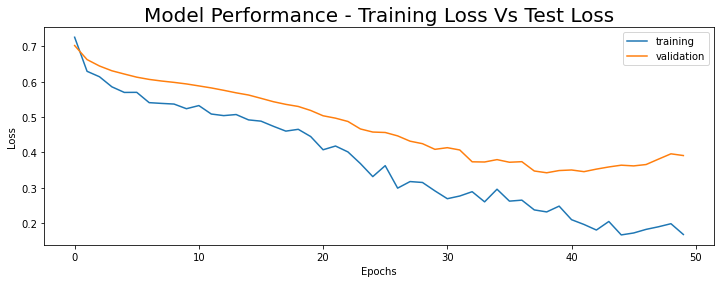

In [176]:
plt.figure(figsize=(12,4))
plt.plot(hist.history["loss"],label="training")
plt.plot(hist.history["val_loss"],label="validation")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Performance - Training Loss Vs Test Loss',size = 20)
plt.show()

### Visualizing the accuracy 

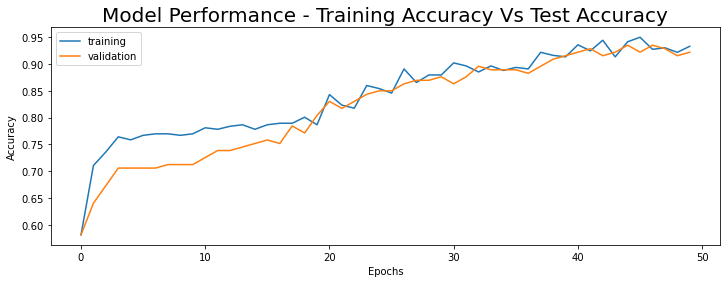

In [177]:
plt.figure(figsize=(12,4))
plt.plot(hist.history["accuracy"],label="training")
plt.plot(hist.history["val_accuracy"],label="validation")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Performance - Training Accuracy Vs Test Accuracy',size = 20)
plt.show()

### Final Conclusion:
**We can finalise our model with "Adam" Optimiser which actually gave good accuracy of 96.67% with training & validation data with minimum loss of  16.7%.**

# ===================================================